<a href="https://colab.research.google.com/github/MalekBraham-DataEngineer/SaiketSystems/blob/main/Saiket_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Telco_Customer_Churn_Dataset .csv'
df = pd.read_csv(file_path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
empty = df.isnull().sum()
print(empty)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.drop('customerID', axis=1, inplace=True)
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

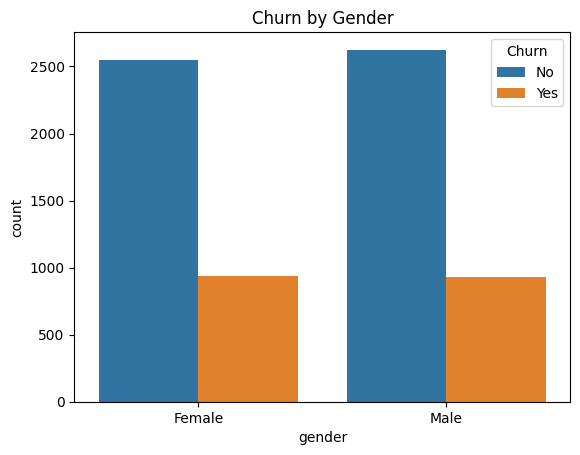

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df.replace({
        'Churn': {0: 'No', 1: 'Yes'},
        'gender': {0: 'Female', 1: 'Male'}
    }), x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()


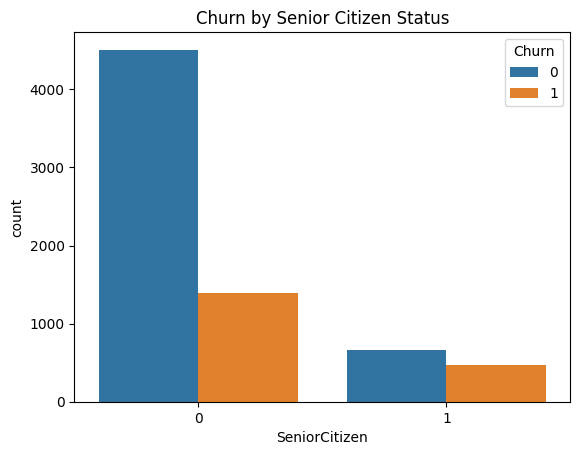

In [ ]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')
plt.show()


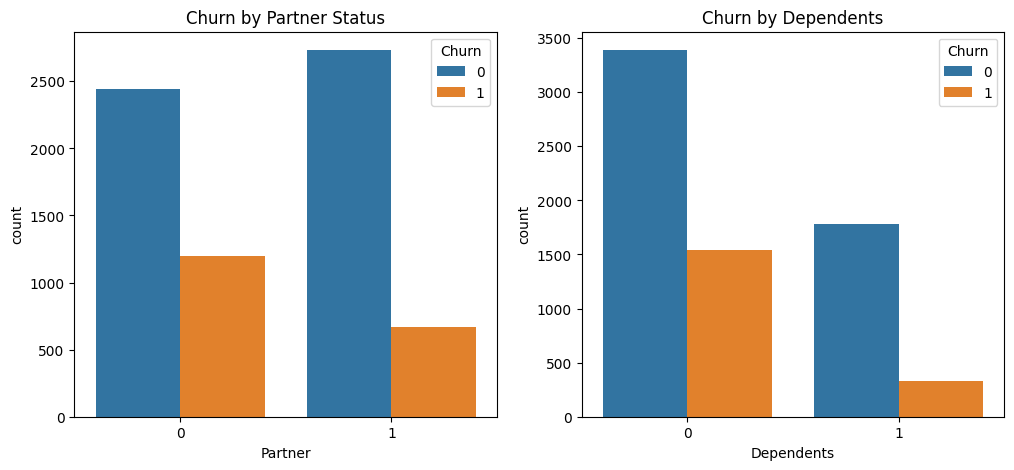

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0])
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[1])
axes[0].set_title('Churn by Partner Status')
axes[1].set_title('Churn by Dependents')
plt.show()


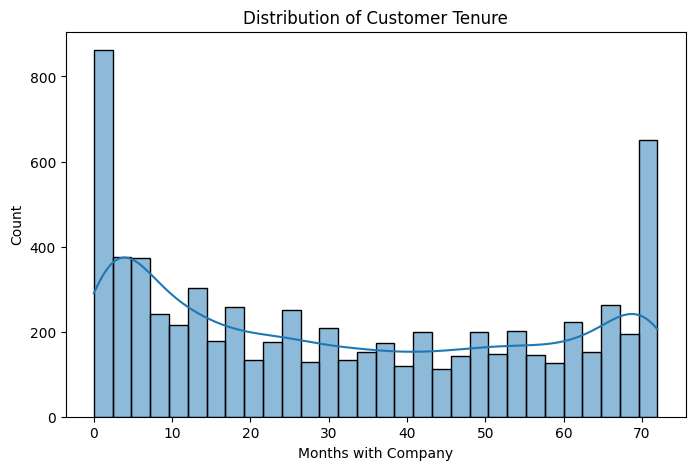

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Months with Company')
plt.show()


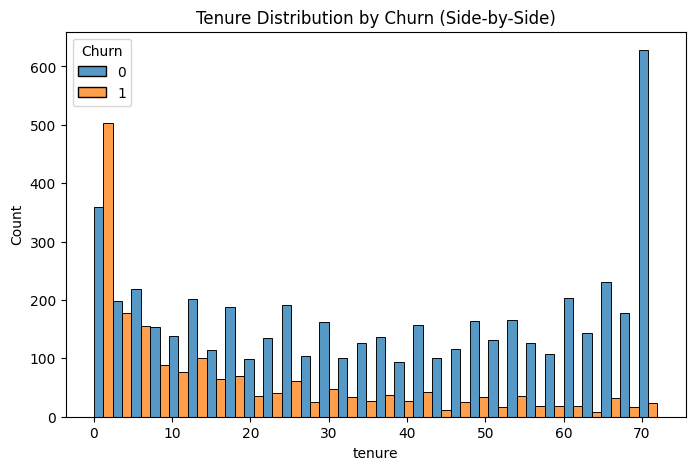

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='dodge')
plt.title('Tenure Distribution by Churn (Side-by-Side)')
plt.show()


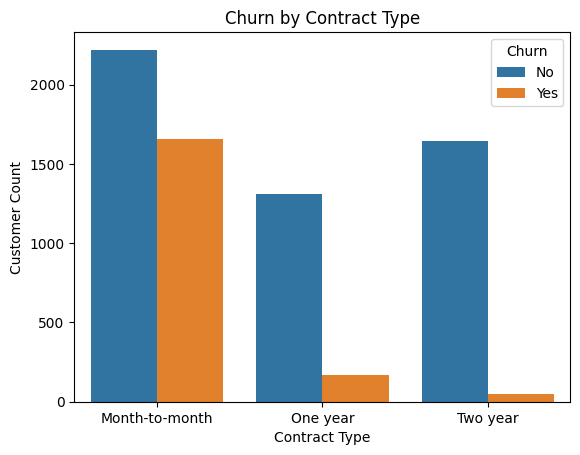

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Contract'] = np.select(
    [
        (df['Contract_One year'] == 1),
        (df['Contract_Two year'] == 1)
    ],
    [
        'One year',
        'Two year'
    ],
    default='Month-to-month'  # when both dummies = 0
)

# Map churn back to Yes/No (if encoded)
#df['Churn'] = df['Churn'].replace({0: 'No', 1: 'Yes'})

# Plot churn by contract type
sns.countplot(data=df.replace({
        'Churn': {0: 'No', 1: 'Yes'}})
        , x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.show()



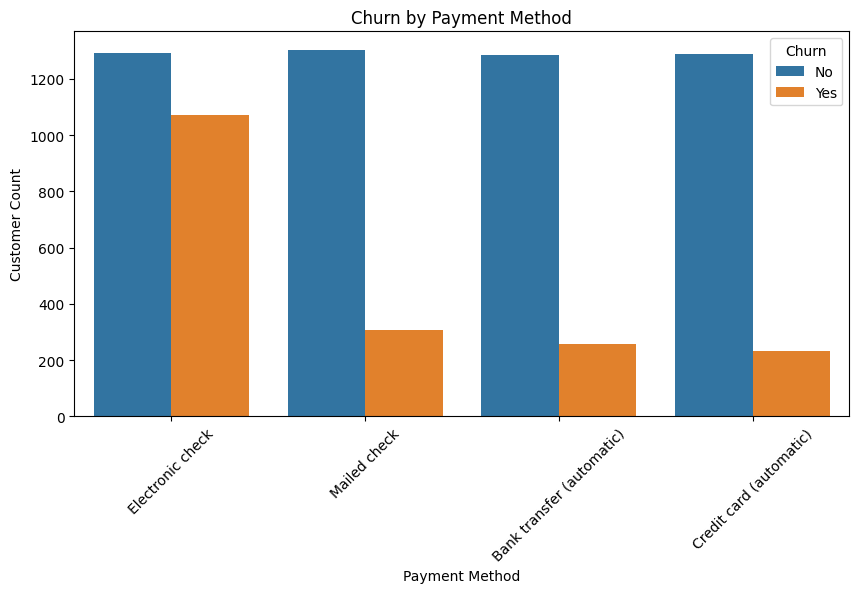

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['PaymentMethod'] = np.select(
    [
        (df['PaymentMethod_Mailed check'] == 1),
        (df['PaymentMethod_Credit card (automatic)'] == 1),
        (df['PaymentMethod_Electronic check'] == 1)
    ],
    [
        'Mailed check',
        'Credit card (automatic)',
        'Electronic check'
    ],
    default='Bank transfer (automatic)'  # when all dummies = 0
)

# Plot churn by payment method
plt.figure(figsize=(10,5))
sns.countplot(data=df.replace({
        'Churn': {0: 'No', 1: 'Yes'}}), x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Tenure segmentation
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–12 months', '13–24 months', '25–48 months', '49–72 months']
)

# Monthly Charges segmentation
df['MonthlyChargeGroup'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 35, 70, 105],
    labels=['Low (<$35)', 'Medium ($35–$70)', 'High (>$70)']
)


In [ ]:

# Calculate churn rate by tenure, monthly charge, and contract type
segment_churn = df.groupby(['TenureGroup', 'MonthlyChargeGroup', 'Contract'],observed=False)['Churn'].mean().reset_index()

segment_churn.rename(columns={'Churn': 'ChurnRate'}, inplace=True)
print(segment_churn.head())


   TenureGroup MonthlyChargeGroup        Contract  ChurnRate
0  0–12 months         Low (<$35)  Month-to-month   0.288802
1  0–12 months         Low (<$35)        One year   0.062500
2  0–12 months         Low (<$35)        Two year   0.000000
3  0–12 months   Medium ($35–$70)  Month-to-month   0.454690
4  0–12 months   Medium ($35–$70)        One year   0.172414


/tmp/ipython-input-1668053927.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = segment_churn.pivot_table(index='TenureGroup', columns='MonthlyChargeGroup', values='ChurnRate')


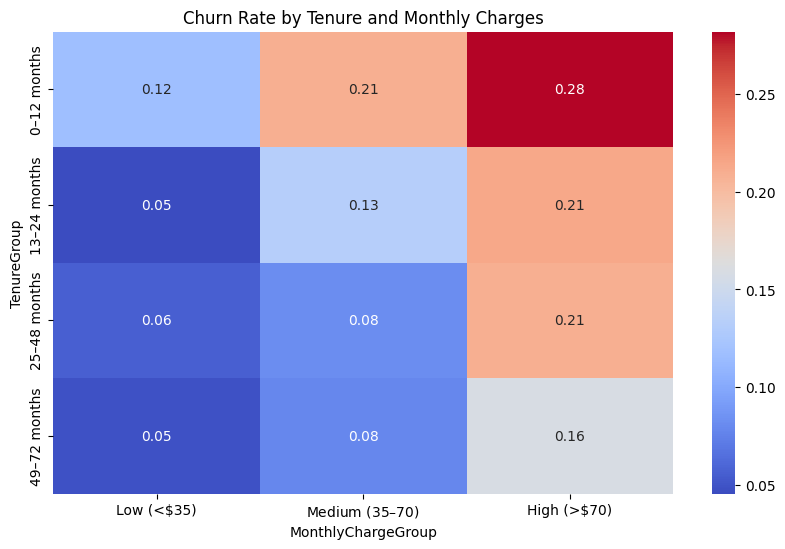

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pivot = segment_churn.pivot_table(index='TenureGroup', columns='MonthlyChargeGroup', values='ChurnRate')
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Churn Rate by Tenure and Monthly Charges')
plt.show()


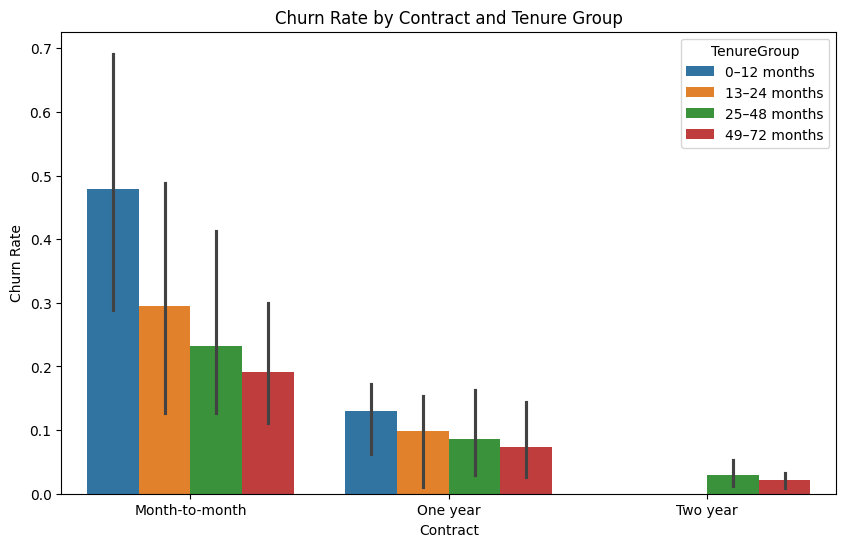

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=segment_churn, x='Contract', y='ChurnRate', hue='TenureGroup')
plt.title('Churn Rate by Contract and Tenure Group')
plt.ylabel('Churn Rate')
plt.show()


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 7043 non-null   int64   
 1   SeniorCitizen                          7043 non-null   int64   
 2   Partner                                7043 non-null   int64   
 3   Dependents                             7043 non-null   int64   
 4   tenure                                 7043 non-null   int64   
 5   PhoneService                           7043 non-null   int64   
 6   PaperlessBilling                       7043 non-null   int64   
 7   MonthlyCharges                         7043 non-null   float64 
 8   TotalCharges                           7043 non-null   float64 
 9   Churn                                  7043 non-null   int64   
 10  MultipleLines_No phone service         7043 non-null   bool 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Separate features/target
y = df["Churn"]
X = df.drop(columns=["Churn"])
X.info()
# Convert bool to int
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


log_reg = LogisticRegression(max_iter=5000, solver='liblinear', C=10, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 7043 non-null   int64   
 1   SeniorCitizen                          7043 non-null   int64   
 2   Partner                                7043 non-null   int64   
 3   Dependents                             7043 non-null   int64   
 4   tenure                                 7043 non-null   int64   
 5   PhoneService                           7043 non-null   int64   
 6   PaperlessBilling                       7043 non-null   int64   
 7   MonthlyCharges                         7043 non-null   float64 
 8   TotalCharges                           7043 non-null   float64 
 9   MultipleLines_No phone service         7043 non-null   int64   
 10  MultipleLines_Yes                      7043 non-null   int64

In [ ]:
feature_names = X_train.columns.tolist()
print(feature_names)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year', 'TenureGroup_13–24 months', 'TenureGroup_25–48 months', 'TenureGroup_49–72 months', 'MonthlyChargeGroup_Medium ($35–$70)', 'MonthlyChargeGroup_High (>$70)']


In [ ]:
print("Iterations:", log_reg.n_iter_)


Iterations: [8]


In [ ]:
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(importance.head(10))


                        Feature  Coefficient
7                MonthlyCharges    -2.168985
11  InternetService_Fiber optic     1.367444
4                        tenure    -1.006996
24          StreamingMovies_Yes     0.496031
22              StreamingTV_Yes     0.484462
34     TenureGroup_49–72 months     0.390807
32     TenureGroup_13–24 months    -0.381601
31            Contract_Two year    -0.336372
26            Contract_Two year    -0.336372
10            MultipleLines_Yes     0.324817


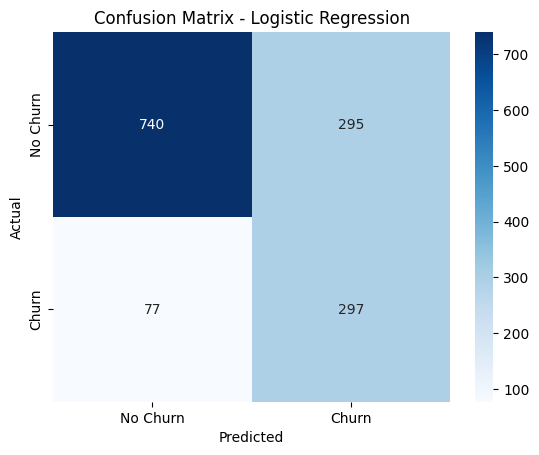

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Create sample already one-hot encoded
sample_high_churn = pd.DataFrame([{
    'gender_Male': 1,
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 1,
    'PhoneService': 1,
    'PaperlessBilling': 1,
    'MonthlyCharges': 95.5,
    'TotalCharges': 95.5,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 1,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'TenureGroup_13–24 months': 0,
    'TenureGroup_25–48 months': 0,
    'TenureGroup_49–72 months': 0,
    'MonthlyChargeGroup_Medium ($35–$70)': 0,
    'MonthlyChargeGroup_High (>$70)': 1
}])

# Ensure all columns match X_train
sample_high_churn = sample_high_churn.reindex(columns=X_train.columns, fill_value=0)

# Scale numeric columns only
sample_high_churn[num_cols] = scaler.transform(sample_high_churn[num_cols])

# Predict churn probability
churn_prob = log_reg.predict_proba(sample_high_churn)[0, 1]
churn_pred = log_reg.predict(sample_high_churn)[0]

print(f"Predicted Churn Probability: {churn_prob:.2f}")
print("Predicted Label:", "Churn" if churn_pred == 1 else "No Churn")


Predicted Churn Probability: 0.95
Predicted Label: Churn


In [ ]:
coeffs = pd.Series(log_reg.coef_[0], index=X_train.columns)
print("Top 10 factors that increase churn:")
print(coeffs.sort_values(ascending=False).head(10))
print("\nTop 10 factors that reduce churn:")
print(coeffs.sort_values(ascending=True).head(10))


Top 10 factors that increase churn:
InternetService_Fiber optic       1.367444
StreamingMovies_Yes               0.496031
StreamingTV_Yes                   0.484462
TenureGroup_49–72 months          0.390807
MultipleLines_Yes                 0.324817
PaymentMethod_Electronic check    0.187170
DeviceProtection_Yes              0.169166
PaperlessBilling                  0.168138
PhoneService                      0.154485
TotalCharges                      0.113303
dtype: float64

Top 10 factors that reduce churn:
MonthlyCharges                         -2.168985
tenure                                 -1.006996
TenureGroup_13–24 months               -0.381601
Contract_Two year                      -0.336372
Contract_Two year                      -0.336372
MonthlyChargeGroup_High (>$70)         -0.200229
InternetService_No                     -0.160010
DeviceProtection_No internet service   -0.160010
TechSupport_No internet service        -0.160010
StreamingMovies_No internet service    -0.1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
churn_prob = rf.predict_proba(sample_high_churn)[0][1]
print(f"Predicted Churn Probability: {churn_prob:.2f}")

Predicted Churn Probability: 0.69


In [ ]:
df['LTV'] = df['MonthlyCharges'] * df['tenure']

ltv_summary = df.groupby('Churn')['LTV'].mean().reset_index()
print(ltv_summary)

   Churn          LTV
0      0  2549.770883
1      1  1531.608828


In [ ]:
df['LTV_Group'] = pd.qcut(df['LTV'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

high_value_risk = df[
    (df['LTV_Group'].isin(['High', 'Very High'])) &
    (df['Contract_One year'] == 0) &
    (df['Contract_Two year'] == 0) &
    (df['TechSupport_Yes'] == 0) &
    (df['OnlineSecurity_Yes'] == 0)
]
risk_rate = high_value_risk['Churn'].mean()
print(f"High-value churn risk rate: {risk_rate:}")



High-value churn risk rate: 0.43878954607977994
